Drug_ID    0
Drug       0
Y          0
dtype: int64


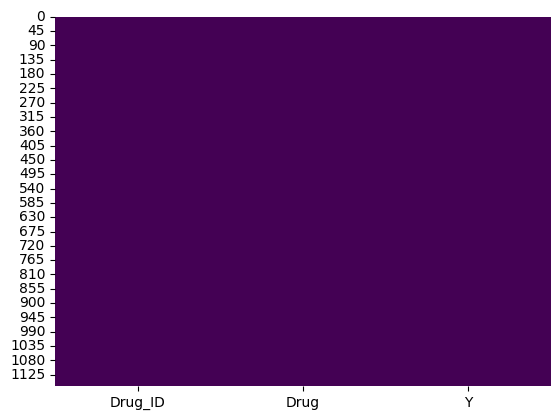

In [ ]:
#check for missing values
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv("../../data/tox21_full.csv")
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")


print(df.isnull().sum())
plt.show()

#output shows that there are no missing values 

In [ ]:
#check for duplicates

print(df['Drug'].duplicated().sum())
print(df['Drug_ID'].duplicated().sum())

#output shows no duplicates in both columns

0
0


In [ ]:
#check for class distribution

df['Y'].value_counts()

Y
0.0    4892
1.0     918
Name: count, dtype: int64

output shows that the dataset is imbalanced
Y=0 has a distinct majority of 80:20. 
This might cause model bias
I will put this into consideration when evaluating model performance. 

In [ ]:
#checking class balance in default TDC split to know if I should re-split

df_train = pd.read_csv("../../data/tox21_train.csv")
df_test = pd.read_csv("../../data/tox21_test.csv")
df_valid =  pd.read_csv("../../data/tox21_valid.csv")

print("Train class ratios:\n", df_train['Y'].value_counts())
print("Test class ratios:\n", df_test['Y'].value_counts())
print("Validation class ratios:\n", df_valid['Y'].value_counts())

#Output shows that while there might be class imbalance, ratios across splits are consistent. 
#TDC’s predefined splits are widely used in published research, so I will be using it to ensure my results are comparable 





Train class ratios:
 Y
0.0    3439
1.0     628
Name: count, dtype: int64
Test class ratios:
 Y
0.0    981
1.0    181
Name: count, dtype: int64
Validation class ratios:
 Y
0.0    472
1.0    109
Name: count, dtype: int64


In [29]:
#Next I perform validation checks by overlapping SMILES between splits to avoid inflated performance metrics

train = set(df_train['Drug'])  
val = set(df_valid['Drug'])
test = set(df_test['Drug'])

assert len(train & val) == 0, "Train/Val overlap detected!"
assert len(train & test) == 0, "Train/Test overlap detected!"
assert len(val & test) == 0, "Val/Test overlap detected!"

print("✅ No overlapping compounds in any split.")



✅ No overlapping compounds in any split.
